### 데이터분석

#### -Descriptive Data Analysis: 통계대표값...데이터 요약
#### -Exploratory Data Analysis: 그래프...패턴 파악
#### -Confirmative Data Analysis: (가설)검정통계량
#### -Predictive Data Analysis: 모델링

#### § ~EDA 과정

##### step1. 데이터; feature, 속성 확인
##### step2. 단변량 분석; 기술통계량, Histogram(수치형), Boxplot..
##### step3. 다변량 분석; 상관관계 분석
##### step4. 결측치 처리
##### step5. 이상치 처리
##### step6. feature 선택, 추가, 삭제

#### Histogram;  '정규분포'처럼 완만한 곡선을 띠는 게 목표!!
##### ; '편향성' 및 'multimodal'(dataset의 중첩)을 판단가능
##### : 구역(bin) 적당히 조정해야..

#### Boxplot; 편향적인 dataset에서 중앙값, 이상치 파악 용이!!
##### ; 범주형(x축)X수치형(y축) 그래프에서 강력!
##### ; 최빈값(mode) < 중앙값(median) < 평균(mean) < 중앙값(median) < 최빈값(mode)

#### Scatter-plot; (선형, 비선형 모두 가능한)상관관계 분석, '피어슨선형상관계수'가 못하는..
##### ; 수치형X수치형 그래프에서 강력!
##### + bubble-plot: (보이는)면적=실제크기의 제곱배 이므로 왜곡 가능성up..
##### 
##### + 비중 및 편향성 확인: Pie charts, 적체bar-graph; 범주형X범주형

### klib

In [12]:
#경고 무시
import warnings
warnings.filterwarnings("ignore")

In [1]:
import klib
import pandas as pd
import seaborn as sns

tac=sns.load_dataset("titanic")
tac.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [4]:
#step1. 데이터 feature, 속성, 결측치
tac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


GridSpec(6, 6)

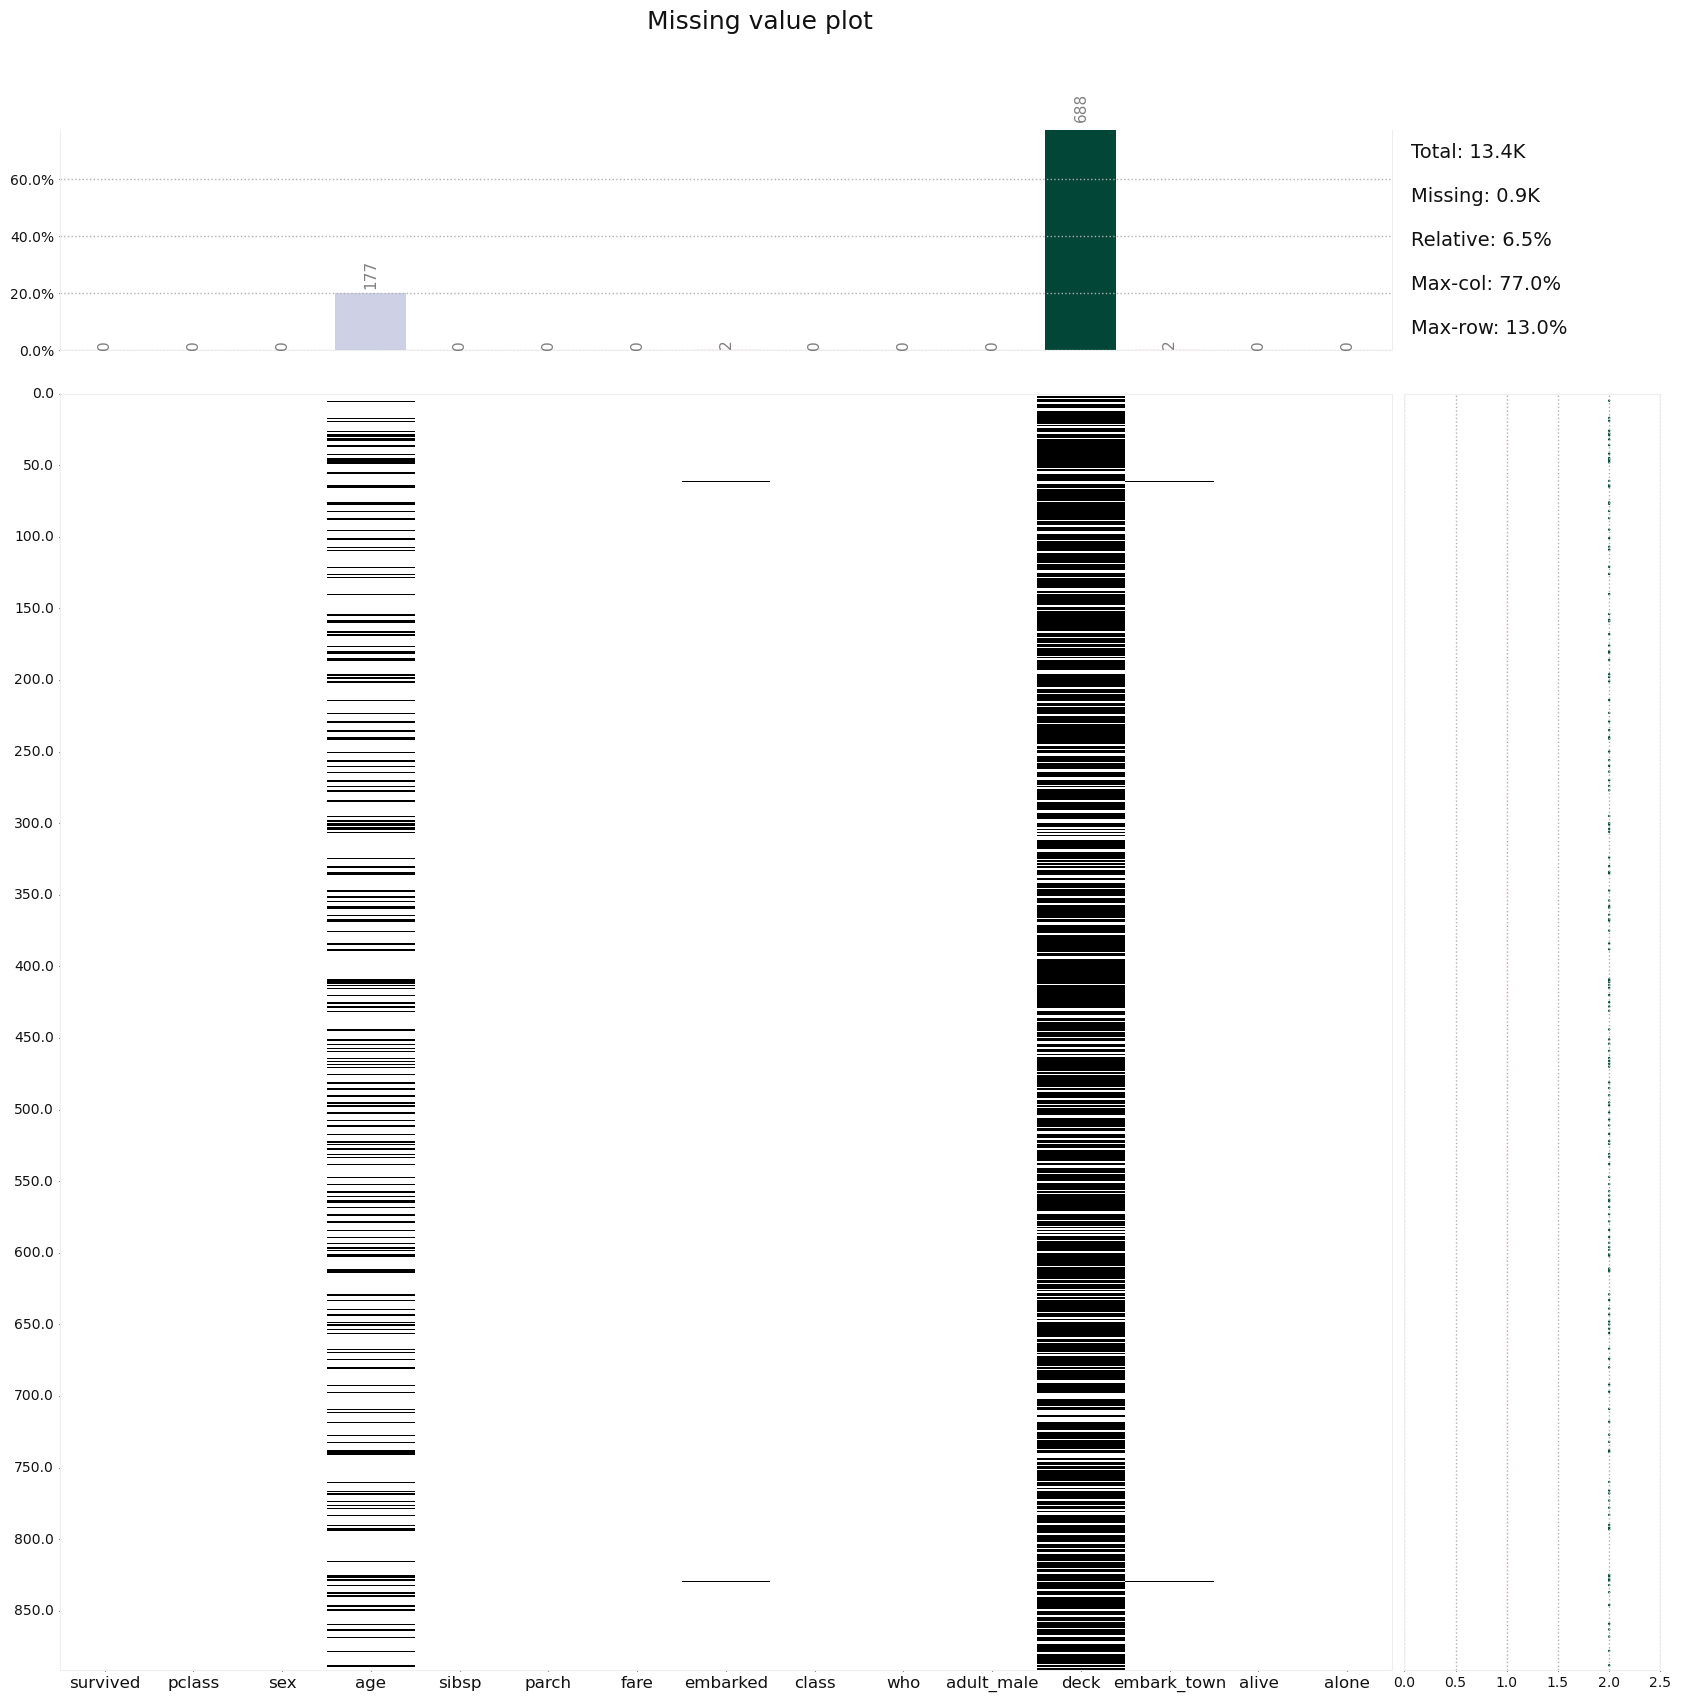

In [7]:
#결측치
klib.missingval_plot(tac)

In [47]:
#고유값 개수가 적당한 'category feature'만 뽑기
cat_idx=[]
for i in range(15):
    if tac.iloc[:,i].nunique()<8:
        cat_idx.append(i)
        print(i, tac.columns[i])

0 survived
1 pclass
2 sex
4 sibsp
5 parch
7 embarked
8 class
9 who
10 adult_male
11 deck
12 embark_town
13 alive
14 alone


In [50]:
tac_cat=tac.iloc[:,cat_idx]
tac_cat.head()

survived  pclass     sex  sibsp  parch embarked  class    who  adult_male  \
0         0       3    male      1      0        S  Third    man        True   
1         1       1  female      1      0        C  First  woman       False   
2         1       3  female      0      0        S  Third  woman       False   
3         1       1  female      1      0        S  First  woman       False   
4         0       3    male      0      0        S  Third    man        True   

  deck  embark_town alive  alone  
0  NaN  Southampton    no  False  
1    C    Cherbourg   yes  False  
2  NaN  Southampton   yes   True  
3    C  Southampton   yes  False  
4  NaN  Southampton    no   True

In [55]:
#그의 여집합인 'numeric feature'만 뽑기
num_idx=list(set(range(15))-set(cat_idx))
tac_num=tac.iloc[:,num_idx]
tac_num.head()

age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500

In [66]:
#tac_cat의 모든 column 'str'형변환: astype
tac_cat.iloc[:,[8,12]]=tac_cat.iloc[:,[8,12]].astype('str')
tac_cat.head()

survived  pclass     sex  sibsp  parch embarked  class    who adult_male  \
0         0       3    male      1      0        S  Third    man          1   
1         1       1  female      1      0        C  First  woman          0   
2         1       3  female      0      0        S  Third  woman          0   
3         1       1  female      1      0        S  First  woman          0   
4         0       3    male      0      0        S  Third    man          1   

  deck  embark_town alive alone  
0  NaN  Southampton    no     0  
1    C    Cherbourg   yes     0  
2  NaN  Southampton   yes     1  
3    C  Southampton   yes     0  
4  NaN  Southampton    no     1

GridSpec(6, 9)

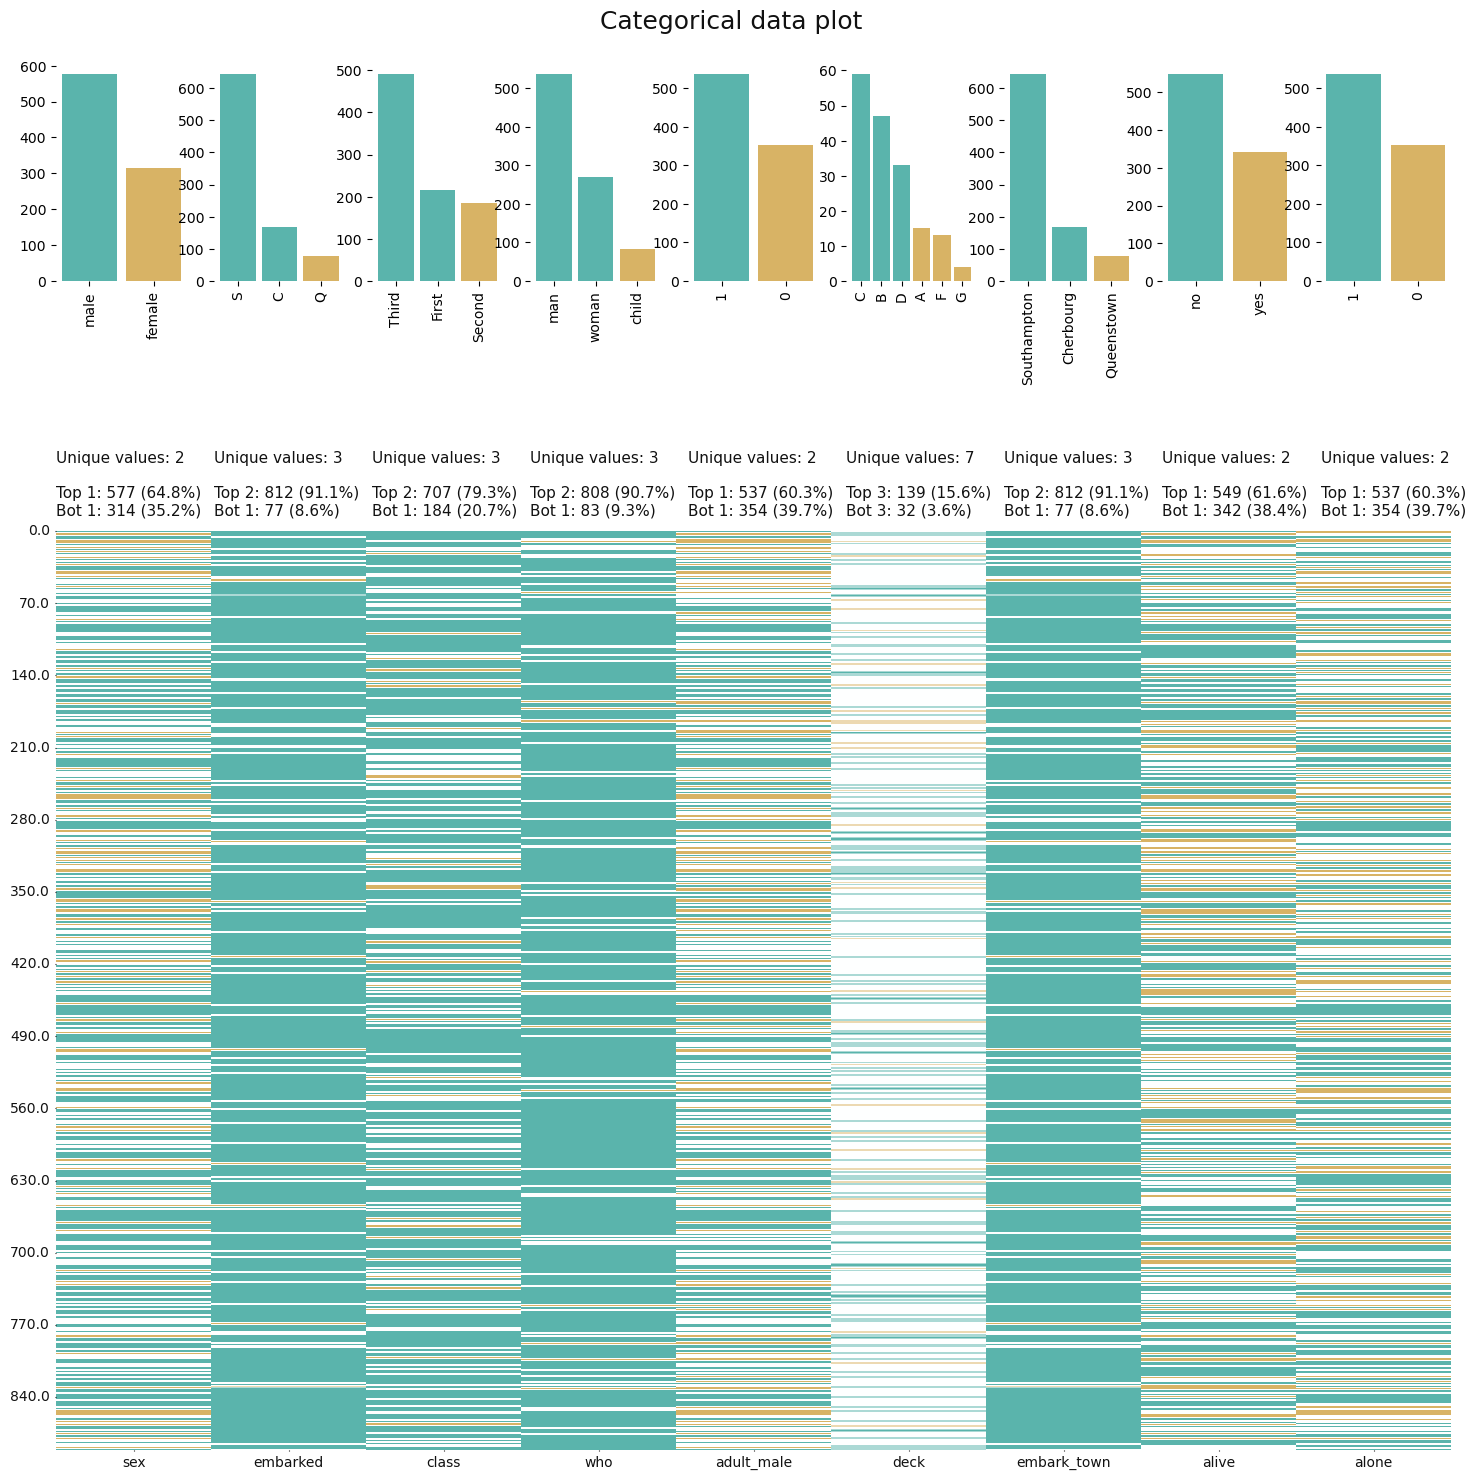

In [67]:
#범주형 변수 프로파일링
klib.cat_plot(tac_cat)

In [64]:
#수치형 변수 기술적통계
tac_num.describe()

age        fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200

<AxesSubplot: ylabel='age'>

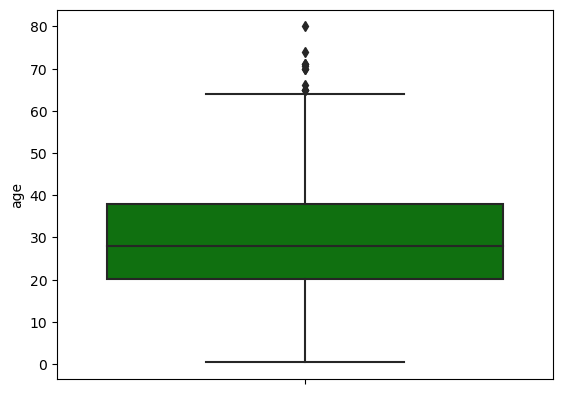

In [11]:
sns.boxplot(y=tac.age,color='green')

<AxesSubplot: ylabel='fare'>

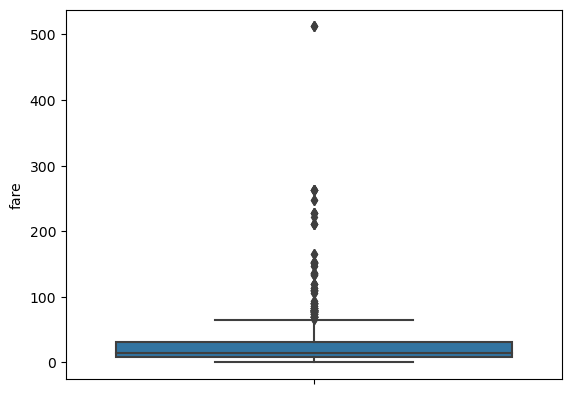

In [4]:
sns.boxplot(y=tac.fare)

<AxesSubplot: xlabel='age', ylabel='Count'>

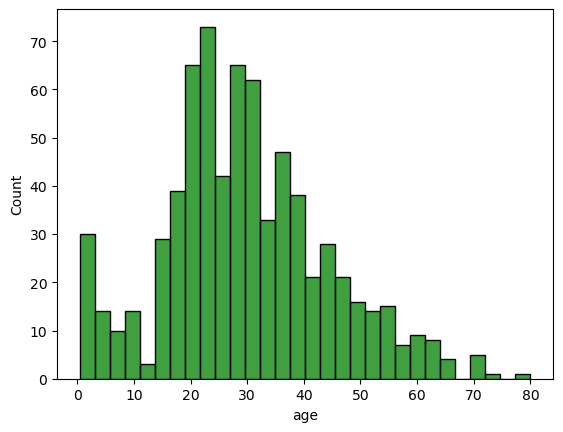

In [12]:
sns.histplot(data=tac,x='age',bins=30,color='green')

<AxesSubplot: xlabel='fare', ylabel='Count'>

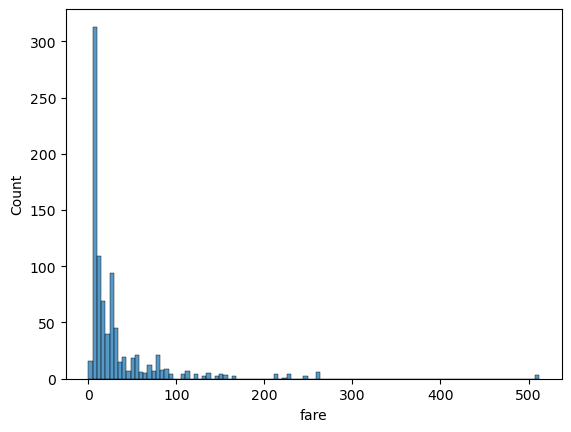

In [6]:
sns.histplot(data=tac,x='fare')

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

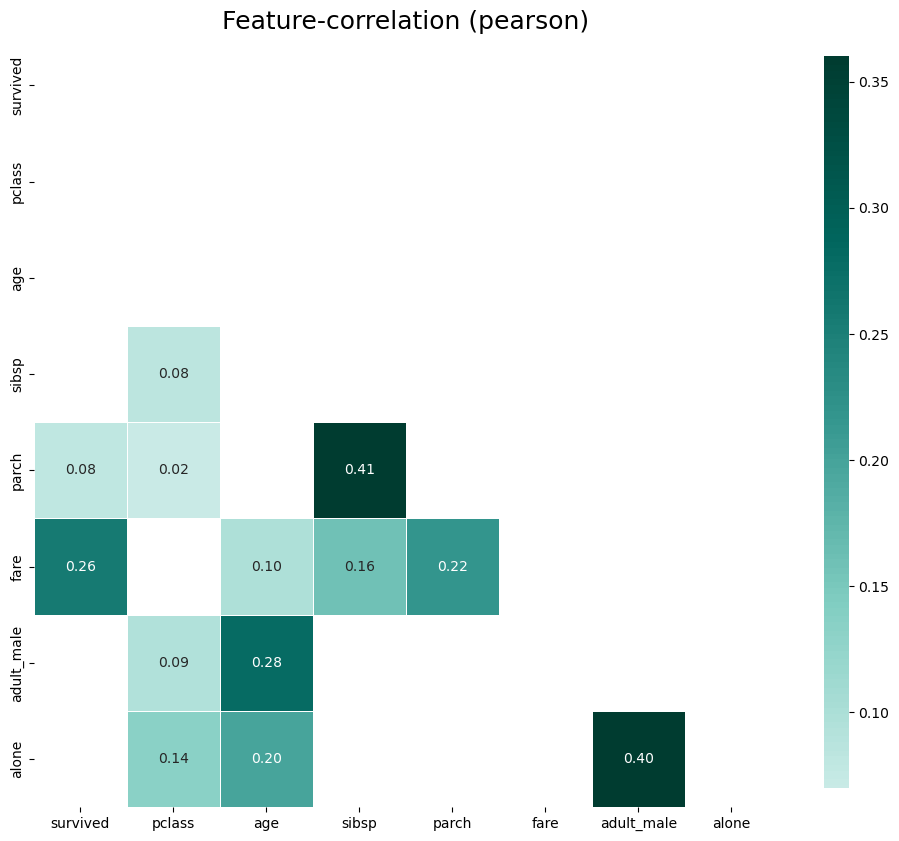

In [68]:
#양의 상관관계
klib.corr_plot(tac,split='pos')

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

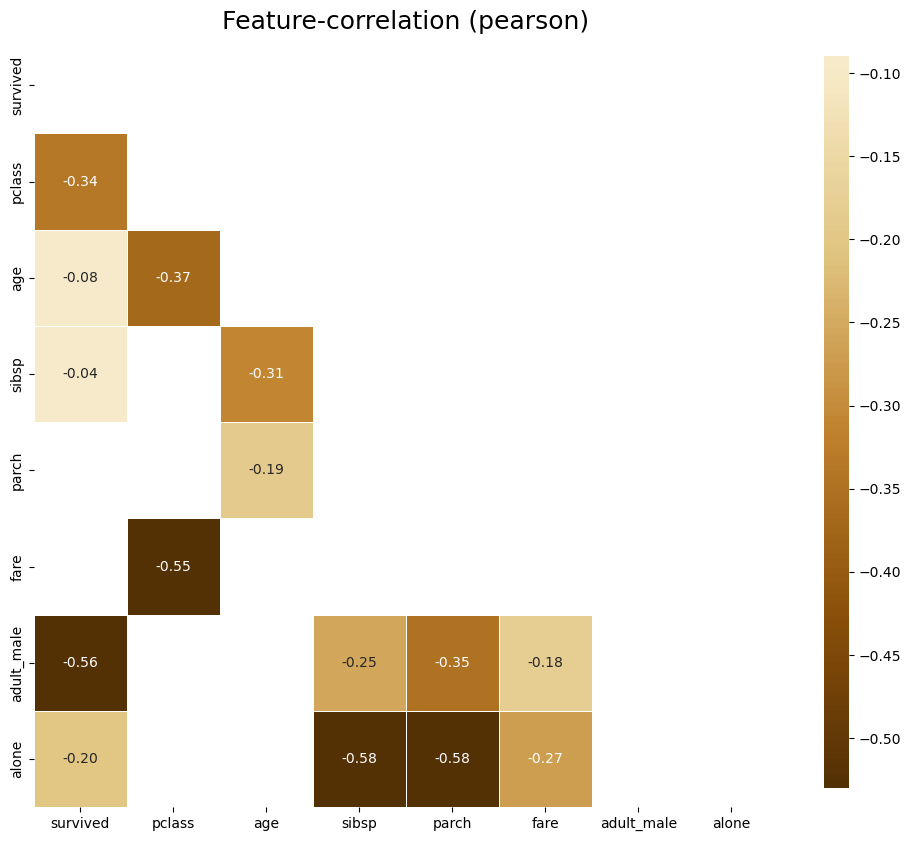

In [69]:
#음의 상관관계
klib.corr_plot(tac,split='neg')

<Axes: title={'center': 'Feature-correlation (pearson)'}>

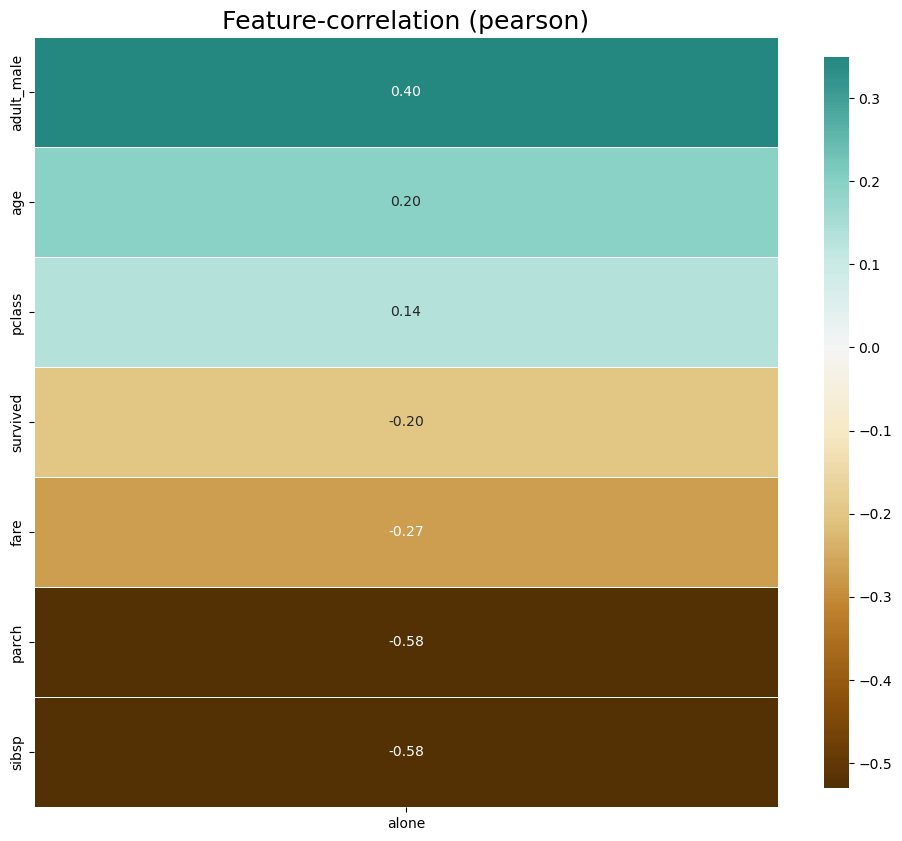

In [71]:
#특정column에 대한 상관관계 파악
klib.corr_plot(tac,target='alone')

In [70]:
#데이터 정제
tac_cleaned=klib.data_cleaning(tac)

Shape of cleaned data: (784, 15) - Remaining NAs: 692


Dropped rows: 107
     of which 107 duplicates. (Rows (first 150 shown): [47, 76, 77, 87, 95, 101, 121, 133, 173, 196, 198, 201, 213, 223, 241, 260, 274, 295, 300, 304, 313, 320, 324, 335, 343, 354, 355, 358, 359, 364, 368, 384, 409, 410, 413, 418, 420, 425, 428, 431, 454, 459, 464, 466, 470, 476, 481, 485, 488, 490, 494, 500, 511, 521, 522, 526, 531, 560, 563, 564, 568, 573, 588, 589, 598, 601, 612, 613, 614, 635, 636, 640, 641, 644, 646, 650, 656, 666, 674, 692, 696, 709, 732, 733, 734, 738, 739, 757, 758, 760, 773, 790, 792, 800, 808, 832, 837, 838, 844, 846, 859, 863, 870, 877, 878, 884, 886])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 177
Reduced memory by at least: 0.06 MB (-75.0%)



### ydata_profiling

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from ydata_profiling import ProfileReport

In [9]:
tac=sns.load_dataset("titanic")
profile=ProfileReport(tac,title='Ydata Profiling Report_titanic',minimal=True) #최소수준의 분석
profile.to_notebook_iframe() #여기다가 출력
profile.to_file('Ydata Profiling Report_titanic.html') #html로 저장

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### PyGWalker

In [1]:
import pandas as pd
import seaborn as sns
import pygwalker as pyg

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…


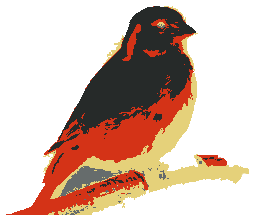

In [2]:
tac=sns.load_dataset('titanic')
gwalker=pyg.walk(tac).display_on_jupyter()